# Accent recognition and gender detection in South American Spanish

This project presents a task of *accent recognition* and *gender detection* performed on audio files of Latin American Spanish accents. The analyzed data comes from opensource speech corpora of Argentinian, Chilean, Colombian, Peruvian and Venezuelan speakers, made publicly available at `openslr.org`. These constitute the first high-quality free **multispeaker** dataset exhisting for these languages. 

The  files are recorded as 48 kHz single-channel audios and are presented divided per accent and gender of the speaker. The total number of speakers considered is 169 per 5 accents, divided in 89 women and 80 men (however it had to be reduced for computational reasons). The content of the recordings are read sentences presented on-screen. Each speaker got assigned 150 phrases. 
 
cf. *Guevara-Rukoz, A., Demirsahin, I., He, F. et al. (2020). Crowdsourcing Latin American Spanish for Low-Resource Text-to-Speech.*

# South American Spanish Accents 

Languages' pronunciation is influenced by geographical, socio-cultural and historical variables. In the case of Spanish, these determine distinctions between the speakers of a given territory, for example differentiating Spanish speakers from Spain from those of the Latin American regions. However, even within the South American continent varying accents (also called dialects) can be found. 
Some of the main distinctive phonetic traits are: 

* maintenance/indistinction between /θ/ and /s/
ex. casa ('house') and caza ('hunt') 

* *yeísmo* (lack of distinction between ortographical [ll] and [y]) 
ex. calló ('silenced') =  cayó ('fell')  in Argentinian/Peruvian

* *deoralization* of final-syllable [s] (weakened to /h/ or maintained)
ex. nosotros -->  [nohotroh], 
ex. todos los cisnes son blancos [ˈto̞ðoz lo‿ˈsːizne‿ˈsːõ̞m ˈblãŋkos]

* *devoicing*/loss of unstressed vowels 
ex. pesos ('pesos [money]'), pesas ('weights') --> [ˈpe̞ss̩] in Central Mexico

Distinctive grammatical/lexicologial traits: 

* 2nd person plural *ustedes/vosotros*
* *voseo* for 2nd person singular (tù vs vos) ex. in Argentinian
* influence from native Latin American languages ex. in Mexican from Nahuatl (camote - sweet potato, huipil- blouse)  
* influence from other romance languages/dialects, ex. *laburar* - lavorare, *yirar* -girare (Argentinian)


cf. *Hualde, José Ignacio (2005), The Sounds of Spanish, Cambridge: Cambridge University Press.* 


In [ ]:
!pip install soundfile

# Mounting my Drive

In [1]:
from google.colab import drive
import os  
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/project_SpeechT/

/content/drive/MyDrive/project_SpeechT


#Creating CSV files for all the data of my dataset 


These csv files contain the entire number of audio files in each accent's dataset.

The **language and gender** information of the speakers is contained in the first piece of the record ID (ex. `arf` for Argentinian female, first 2 letters indicate the accent, the last letter indicates the gender). The second part, meaning the **speaker ID** is the sum of the first piece and 5 digit numbers (ex. `pem_08784`), while the **record ID** corresponds to the sum of the speaker ID and the 11 digit number indicating the record's code. **Transcriptions** are finally contained in the last columns. 

In [ ]:
import os 
import csv 
import re 


splitted= []
speakID= []
audioId= []
transcription= []
temp=[]
lang_sex_info= []
speakerID= []

def from_txt_to_csv (file_txt, csv_file_name): 
  with open(file_txt, 'r', encoding= "utf-8") as in_file:
    stripped = (line.strip() for line in in_file)
    for line in stripped: 
      speakID.append((re.findall (r"(.*?)_", line)))
      splitted.append(line.split())
    for e in speakID:
      lang_sex_info.append(e[0])
      speakerID.append((e[0]+ "_" + e[1]))
    for e in splitted:
      audioId.append(e[0])
      temp.append(e[1:])
  for i in temp: 
    transcription.extend([" ".join(i)])
    
  with open(csv_file_name, 'w') as out_file:
    writer = csv.writer(out_file)
    writer.writerow(('Language and sex info', 'SpeakerId','RecordId', 'Transcription'))
    writer.writerows(zip(lang_sex_info,speakerID,audioId, transcription))

In [ ]:
#from_txt_to_csv("drive/MyDrive/project_SpeechT/venezuelan/vem_data.txt", "drive/MyDrive/project_SpeechT/venezuelan/vem_data.csv")

This is an example of what every target group (female/male) per accent contains (organized in the csv file)



In [ ]:
import pandas as pd 

def dataframe_csv(filepath): 
  df= pd.read_csv(filepath, sep= ",", delimiter= ",")
  return df

In [ ]:
dataframe_csv("argentinian/arf_data.csv")

,Language and sex info,SpeakerId,RecordId,Transcription
0,arf,arf_00295,arf_00295_00000740990,¿Quieres que te mande el artículo?
1,arf,arf_00295,arf_00295_00001008290,Dame únicamente el dato más relevante
2,arf,arf_00295,arf_00295_00020689215,Hay varios cines cerca de tu hotel. ¿Estas bus...
3,arf,arf_00295,arf_00295_00023658548,Los niños tienen mucha imaginación
4,arf,arf_00295,arf_00295_00075310490,Los presidentes están muy peleados por el últi...
...,...,...,...,...
3916,arf,arf_09799,arf_09799_02088352396,De postre voy a servir peras al vino tinto
3917,arf,arf_09799,arf_09799_02091967505,¿Cuántos años tiene el último campeón de fórmu...
3918,arf,arf_09799,arf_09799_02118116965,Mañana a la noche va a nevar
3919,arf,arf_09799,arf_09799_02136293027,Tradicionalmente la comida italiana se acompañ...


#Creating a list with all the files from each South American Spanish accent folder

* Argentinian female speakers
* Argentinian male speakers
* Colombian female speakers
* Colombian male speakers
* Peruvian female speakers
* Peruvian male speakers
* Venezuelan female speakers
* Venezuelan male speakers
* Chilean female speakers
* Chilean male speakers

In [23]:
import glob 
all_files_list= []
for audiofile in glob.glob("*/*/*.wav"):
  all_files_list.append(audiofile)

In [24]:
all_files_list

['argentinian/es_ar_male/arm_06136_00545342835.wav',
 'argentinian/es_ar_male/arm_06136_00486481946.wav',
 'argentinian/es_ar_male/arm_06136_00527044669.wav',
 'argentinian/es_ar_male/arm_06136_00095815237.wav',
 'argentinian/es_ar_male/arm_06136_00386857099.wav',
 'argentinian/es_ar_male/arm_06136_00035963132.wav',
 'argentinian/es_ar_male/arm_06136_00383702325.wav',
 'argentinian/es_ar_male/arm_06136_00279667527.wav',
 'argentinian/es_ar_male/arm_06136_00389029506.wav',
 'argentinian/es_ar_male/arm_06136_00358528761.wav',
 'argentinian/es_ar_male/arm_06136_00062303749.wav',
 'argentinian/es_ar_male/arm_06136_00260165323.wav',
 'argentinian/es_ar_male/arm_06136_00136487766.wav',
 'argentinian/es_ar_male/arm_06136_00243767965.wav',
 'argentinian/es_ar_male/arm_06136_00367218284.wav',
 'argentinian/es_ar_male/arm_06136_00035496108.wav',
 'argentinian/es_ar_male/arm_06136_00537994622.wav',
 'argentinian/es_ar_male/arm_06136_00040030944.wav',
 'argentinian/es_ar_male/arm_06136_00459698934

# Checking the total of wav files in my dataset 

In [25]:
print("The total number of audio files in the dataset is", len(all_files_list))

The total number of audio files in the dataset is 22988


# Defining the list with my targets (accent  + gender) 

The elements contained in the list of targets correspond to the labels of the audio files (excluded the identification n. that signals the speaker and recordId ex. **es_ar_male**/`arm_07049_01173663195.wav` ). As can be seen, the first part indicates the accent (ex. `es_ar` for Argentinian, `es_co` for Colombian, etc.), while the last part signals the gender of the speaker (`female/male`). 

In [26]:
target= ["es_ar_female", "es_ar_male", "es_co_female", "es_co_male", "es_pe_female", "es_pe_male", "es_ve_female", "es_ve_male", "es_cl_female","es_cl_male"]

#Dividing the files per target group (target is the label for each accent - female or male) 

Here I am creating a list with sublists for each accent type and gender. So in the end there will be 10 lists containing elements of the above defined targets. 

In [29]:
#files per target group
files_list=[[] for i in range(len(target))]
for f in all_files_list:
  w = f.split('/')[1]
  files_list[target.index(w)].append(f)

In [37]:
len(files_list)

10

In [30]:
files_list

[['argentinian/es_ar_female/arf_07508_01710159983.wav',
  'argentinian/es_ar_female/arf_07508_01915634961.wav',
  'argentinian/es_ar_female/arf_07508_01899389388.wav',
  'argentinian/es_ar_female/arf_07508_01729808438.wav',
  'argentinian/es_ar_female/arf_07508_01710413524.wav',
  'argentinian/es_ar_female/arf_07508_01747550184.wav',
  'argentinian/es_ar_female/arf_07508_01581676580.wav',
  'argentinian/es_ar_female/arf_07508_01812669181.wav',
  'argentinian/es_ar_female/arf_07508_01658863633.wav',
  'argentinian/es_ar_female/arf_07508_01914699419.wav',
  'argentinian/es_ar_female/arf_07508_01894623627.wav',
  'argentinian/es_ar_female/arf_07508_01894142985.wav',
  'argentinian/es_ar_female/arf_07508_02039394281.wav',
  'argentinian/es_ar_female/arf_07973_00070461100.wav',
  'argentinian/es_ar_female/arf_07973_00330099412.wav',
  'argentinian/es_ar_female/arf_07973_00059674421.wav',
  'argentinian/es_ar_female/arf_07508_02064426332.wav',
  'argentinian/es_ar_female/arf_07508_0207064569

Not choosing the amount of files per target in each sublist

In [ ]:
import numpy as np
for i in range(len(files_list)):
  _tmp = np.random.permutation(files_list[i])         
  #_tmp = [files_list[i][r] for r in rand_idx]
  files_list[i]=_tmp

# Checking the number of files per each target(label)

Here we can see the number of audio files available from the dataset for each target. The greatest number of data comes from Argentinian female speakers (recordings from Argentinian speakers are also the majority). The less data is instead available for Venezuelan female speakers (and the Venezuelan accent group).

In [ ]:
files_per_target=[] 
for f,l in zip(files_list,target):
  files_per_target.append((l,len(f)))                                               
files_per_target

[('es_ar_female', 3531),
 ('es_ar_male', 1818),
 ('es_co_female', 2369),
 ('es_co_male', 2534),
 ('es_pe_female', 2529),
 ('es_pe_male', 2918),
 ('es_ve_female', 1161),
 ('es_ve_male', 1754),
 ('es_cl_female', 1738),
 ('es_cl_male', 2636)]

In [ ]:
for e,n in files_per_target: 
  print("For the target group", e, "there are", n, "available audio files.")

For the target group es_ar_female there are 3531 available audio files.
For the target group es_ar_male there are 1818 available audio files.
For the target group es_co_female there are 2369 available audio files.
For the target group es_co_male there are 2534 available audio files.
For the target group es_pe_female there are 2529 available audio files.
For the target group es_pe_male there are 2918 available audio files.
For the target group es_ve_female there are 1161 available audio files.
For the target group es_ve_male there are 1754 available audio files.
For the target group es_cl_female there are 1738 available audio files.
For the target group es_cl_male there are 2636 available audio files.


# Reducing the data considered from the dataset

In order to be able to use Colab (with its limitations), but also to have different results to compare, 5 experiments are executed with datasets of different length (reduced versions of the original dataset with 22.988 audio files). 



1.   1.000 audio files in total (selecting 100 speakers per target accent)
2.   2.000 audio files in total (selecting 200 speakers per target accent)
3.   4.000 audio files in total (selecting 400 speakers per target accent)
4.   10% of 22988 audiofiles (without equal number of speakers per target)
5.   20% of 22988 audiofiles (without equal number of speakers per target)



In [ ]:
#function to select the number of speakers per target accent to take into consideration

import random 

red_dataset1= []
red_dataset2= []
red_dataset4= []

def files_per_t_red(final_list,desired_number):
  for audiofile in files_list:
    random.shuffle(audiofile)                       #shuffling here because the audio files are ordered per speaker 
    final_list.append(audiofile[:desired_number])
  return final_list


In [ ]:
files_per_t_red(red_dataset1, 100)

[['argentinian/es_ar_female/arf_05679_00776582372.wav',
  'argentinian/es_ar_female/arf_07508_00058317816.wav',
  'argentinian/es_ar_female/arf_06136_01218447161.wav',
  'argentinian/es_ar_female/arf_07049_01995548759.wav',
  'argentinian/es_ar_female/arf_05223_01414560148.wav',
  'argentinian/es_ar_female/arf_04310_01050202526.wav',
  'argentinian/es_ar_female/arf_09799_00281435378.wav',
  'argentinian/es_ar_female/arf_03034_00418628600.wav',
  'argentinian/es_ar_female/arf_04766_02056648295.wav',
  'argentinian/es_ar_female/arf_07049_01583527408.wav',
  'argentinian/es_ar_female/arf_04310_00819755937.wav',
  'argentinian/es_ar_female/arf_07049_00328884710.wav',
  'argentinian/es_ar_female/arf_09334_01635822066.wav',
  'argentinian/es_ar_female/arf_04766_00488824215.wav',
  'argentinian/es_ar_female/arf_08784_01128081436.wav',
  'argentinian/es_ar_female/arf_02485_01632826888.wav',
  'argentinian/es_ar_female/arf_03349_02013080851.wav',
  'argentinian/es_ar_female/arf_03853_0006920041

In [ ]:
files_per_t_red(red_dataset2, 200)

[['argentinian/es_ar_female/arf_04766_01106563901.wav',
  'argentinian/es_ar_female/arf_08784_00976227560.wav',
  'argentinian/es_ar_female/arf_01523_01947422500.wav',
  'argentinian/es_ar_female/arf_02121_02137315718.wav',
  'argentinian/es_ar_female/arf_07508_02067478705.wav',
  'argentinian/es_ar_female/arf_04310_02005474924.wav',
  'argentinian/es_ar_female/arf_00610_01509182660.wav',
  'argentinian/es_ar_female/arf_03349_01913479580.wav',
  'argentinian/es_ar_female/arf_03034_01048632192.wav',
  'argentinian/es_ar_female/arf_03349_01042430163.wav',
  'argentinian/es_ar_female/arf_03397_01016802945.wav',
  'argentinian/es_ar_female/arf_04310_01646992510.wav',
  'argentinian/es_ar_female/arf_06136_00735609361.wav',
  'argentinian/es_ar_female/arf_05679_01459544898.wav',
  'argentinian/es_ar_female/arf_06136_01232553376.wav',
  'argentinian/es_ar_female/arf_00610_01210670029.wav',
  'argentinian/es_ar_female/arf_07973_01397067032.wav',
  'argentinian/es_ar_female/arf_05223_0115870456

In [ ]:
files_per_t_red(red_dataset4, 400)

[['argentinian/es_ar_female/arf_07508_00647261340.wav',
  'argentinian/es_ar_female/arf_07060_01654455534.wav',
  'argentinian/es_ar_female/arf_04310_01282103717.wav',
  'argentinian/es_ar_female/arf_07049_00544517990.wav',
  'argentinian/es_ar_female/arf_07973_00392782442.wav',
  'argentinian/es_ar_female/arf_00295_00023658548.wav',
  'argentinian/es_ar_female/arf_08886_01305776349.wav',
  'argentinian/es_ar_female/arf_09697_01748461436.wav',
  'argentinian/es_ar_female/arf_03398_01736798627.wav',
  'argentinian/es_ar_female/arf_03034_01296122498.wav',
  'argentinian/es_ar_female/arf_08421_00281596763.wav',
  'argentinian/es_ar_female/arf_05679_00869821489.wav',
  'argentinian/es_ar_female/arf_06136_00589185217.wav',
  'argentinian/es_ar_female/arf_08421_01138072577.wav',
  'argentinian/es_ar_female/arf_05679_00113185935.wav',
  'argentinian/es_ar_female/arf_03853_01593746185.wav',
  'argentinian/es_ar_female/arf_08784_01127452782.wav',
  'argentinian/es_ar_female/arf_00610_0211389708

In [ ]:
files_per_target1=[]
files_per_target2=[] 
files_per_target4=[] 

def check_files_per_target(reduced_dataset, list_fin): 
  for f,l in zip(reduced_dataset,target):
    list_fin.append((l,len(f)))                                      
  return list_fin

Now the dataset contains 1000 audiofiles, 100 per each target. 

In [ ]:
check_files_per_target(red_dataset1, files_per_target1)

[('es_ar_female', 100),
 ('es_ar_male', 100),
 ('es_co_female', 100),
 ('es_co_male', 100),
 ('es_pe_female', 100),
 ('es_pe_male', 100),
 ('es_ve_female', 100),
 ('es_ve_male', 100),
 ('es_cl_female', 100),
 ('es_cl_male', 100)]

Now the dataset contains 2000 audiofiles, 200 per each target. 

In [ ]:
check_files_per_target(red_dataset2, files_per_target2)

[('es_ar_female', 200),
 ('es_ar_male', 200),
 ('es_co_female', 200),
 ('es_co_male', 200),
 ('es_pe_female', 200),
 ('es_pe_male', 200),
 ('es_ve_female', 200),
 ('es_ve_male', 200),
 ('es_cl_female', 200),
 ('es_cl_male', 200)]

Now the dataset contains 4000 audiofiles, 400 per each target. 

In [ ]:
check_files_per_target(red_dataset4, files_per_target4)

[('es_ar_female', 400),
 ('es_ar_male', 400),
 ('es_co_female', 400),
 ('es_co_male', 400),
 ('es_pe_female', 400),
 ('es_pe_male', 400),
 ('es_ve_female', 400),
 ('es_ve_male', 400),
 ('es_cl_female', 400),
 ('es_cl_male', 400)]

#Dividing the data for training (70%), validation(15%) and testing (15%)

In [68]:
partitions={}                   #dict of partitions (keys= train,test,valid, values=audio files x part.)
partitions["train"]=[]
partitions["valid"]=[]
partitions["test"]=[]

def data_division(reduced_dataset):
  for i in range(len(reduced_dataset)): 
    train_pct = int(len(reduced_dataset[i])*0.7)
    valid_pct = int((len(reduced_dataset[i])-train_pct)*0.5)
    test_pct=len(reduced_dataset[i])-train_pct-valid_pct
    #print(test_pct, "Files in test set per label in targets")    #files considered per each accent and speakers' gender
    partitions["train"].extend(reduced_dataset[i][:train_pct])
    partitions["valid"].extend(reduced_dataset[i][train_pct:train_pct+valid_pct])
    partitions["test"].extend(reduced_dataset[i][train_pct+valid_pct:])

  print("Total number of files in this dataset:", sum([ len(listElem) for listElem in reduced_dataset]) )
  print("Number of audio files in the training set:",len(partitions["train"]))
  print("Number of audiofiles in the validation set:",len(partitions["valid"]))
  print("Number of audiofiles in the test set:",len(partitions["test"]))
  

Considering the whole dataset (with all files) for experiments 4 and 5

In [69]:
data_division(files_list)


530 Files in test set per label in targets
273 Files in test set per label in targets
356 Files in test set per label in targets
381 Files in test set per label in targets
380 Files in test set per label in targets
438 Files in test set per label in targets
175 Files in test set per label in targets
264 Files in test set per label in targets
261 Files in test set per label in targets
396 Files in test set per label in targets
Total number of files in this dataset: 22988
Number of audio files in the training set: 16086
Number of audiofiles in the validation set: 3448
Number of audiofiles in the test set: 3454


In [ ]:
#data 1st experiment 100 files per target group

data_division(red_dataset1)

Total number of files in this dataset: 1000
Number of audio files in the training set: 700
Number of audiofiles in the validation set: 150
Number of audiofiles in the test set: 150


In [ ]:
#data 2nd experiment 200 files per target group

data_division(red_dataset2)

Total number of files in this dataset: 2000
Number of audio files in the training set: 1400
Number of audiofiles in the validation set: 300
Number of audiofiles in the test set: 300


In [ ]:
#data 3rd experiment  400 files per target group

data_division(red_dataset4)

Total number of files in this dataset: 4000
Number of audio files in the training set: 2800
Number of audiofiles in the validation set: 600
Number of audiofiles in the test set: 600


# Shuffling the data inside each partition

*(because they were ordered per target group)*

In [ ]:
import numpy as np

for key in partitions:
  np.random.shuffle(partitions[key])

# Creating csv files for each partition, to have **fixed** elements in each partition 

In [ ]:
def write_list_to_file(partition_list, filename):

    with open(filename, "w") as outfile:
        for wavfile in partition_list:
            outfile.write(wavfile)
            outfile.write("\n")


In [ ]:
write_list_to_file(partitions["train"], "reduced_dataset/SASA_data/train_data_whole.csv")

In [ ]:
write_list_to_file(partitions["test"], "reduced_dataset/SASA_data/test_data_whole.csv")

In [ ]:
write_list_to_file(partitions["valid"], "reduced_dataset/SASA_data/valid_data_whole.csv")

In [ ]:
write_list_to_file(partitions["train"], "reduced_dataset/SASA_data/train_data1.csv")

In [ ]:
write_list_to_file(partitions["test"], "reduced_dataset/SASA_data/test_data1.csv")

In [ ]:
write_list_to_file(partitions["valid"], "reduced_dataset/SASA_data/valid_data1.csv")

In [ ]:
write_list_to_file(partitions["train"], "reduced_dataset/SASA_data/train_data2.csv")

In [ ]:
write_list_to_file(partitions["test"], "reduced_dataset/SASA_data/test_data2.csv")

In [ ]:
write_list_to_file(partitions["valid"], "reduced_dataset/SASA_data/valid_data2.csv")

In [ ]:
write_list_to_file(partitions["valid"], "reduced_dataset/SASA_data/valid_data4.csv")

In [ ]:
write_list_to_file(partitions["test"], "reduced_dataset/SASA_data/test_data4.csv")

In [ ]:
write_list_to_file(partitions["train"], "reduced_dataset/SASA_data/train_data4.csv")

#Checking what is inside csv files 

Each csv file contains shuffled audio files from each target group with different speakers. The distribution of data for each speakers group is equal. 

In [ ]:

with open("reduced_dataset/SASA_data/train_data1.csv") as fcsv:
      lines= fcsv.readlines()
      for l in lines:
        print(l)

chilean/es_cl_male/clm_09697_01978275857.wav

venezuelan/es_ve_male/vem_07508_00315529115.wav

argentinian/es_ar_female/arf_00295_00761352415.wav

argentinian/es_ar_female/arf_03034_00554664107.wav

chilean/es_cl_male/clm_01208_01074857583.wav

venezuelan/es_ve_female/vef_06136_00273523289.wav

chilean/es_cl_female/clf_09334_01880005131.wav

argentinian/es_ar_female/arf_07049_00279660397.wav

columbian/es_co_female/cof_02484_01774131604.wav

chilean/es_cl_female/clf_05223_01708175751.wav

chilean/es_cl_female/clf_06136_01945518968.wav

columbian/es_co_male/com_02484_02019953506.wav

peruvian/es_pe_female/pef_03034_00457476201.wav

columbian/es_co_female/cof_02436_01356252227.wav

venezuelan/es_ve_male/vem_03397_01123201911.wav

columbian/es_co_female/cof_05223_02033570069.wav

columbian/es_co_female/cof_06136_01665608521.wav

argentinian/es_ar_male/arm_08784_00421462788.wav

chilean/es_cl_male/clm_01208_01846175505.wav

peruvian/es_pe_female/pef_07508_01659267215.wav

argentinian/es_ar

In [ ]:
with open("reduced_dataset/SASA_data/test_data2.csv") as fcsv:
      lines= fcsv.readlines()
      for l in lines[:20]:
        print(l)

peruvian/es_pe_male/pem_03349_01676663942.wav

argentinian/es_ar_male/arm_05223_01002478053.wav

peruvian/es_pe_male/pem_02121_01378160423.wav

columbian/es_co_male/com_03397_01963440019.wav

peruvian/es_pe_male/pem_03349_01330143564.wav

chilean/es_cl_female/clf_08421_00151623147.wav

peruvian/es_pe_female/pef_02121_00331314402.wav

peruvian/es_pe_female/pef_00610_00121281369.wav

peruvian/es_pe_female/pef_07508_02006338029.wav

columbian/es_co_male/com_09334_00576470512.wav

chilean/es_cl_female/clf_07049_00791461428.wav

venezuelan/es_ve_female/vef_06136_02026689430.wav

columbian/es_co_female/cof_04310_01817575999.wav

peruvian/es_pe_male/pem_02484_00101943083.wav

argentinian/es_ar_female/arf_08886_01611084870.wav

chilean/es_cl_female/clf_05223_00420760994.wav

columbian/es_co_male/com_01523_01271172548.wav

columbian/es_co_female/cof_07508_00395570680.wav

argentinian/es_ar_male/arm_09334_01571236583.wav

chilean/es_cl_female/clf_00610_00025628111.wav



In [ ]:
with open("reduced_dataset/SASA_data/valid_data4.csv") as fcsv:
      lines= fcsv.readlines()
      for l in lines[:20]:
        print(l)

argentinian/es_ar_male/arm_07049_00733488063.wav

argentinian/es_ar_male/arm_03397_00278640273.wav

argentinian/es_ar_male/arm_02484_00263429266.wav

chilean/es_cl_female/clf_01523_01690498597.wav

venezuelan/es_ve_male/vem_05223_01411139659.wav

peruvian/es_pe_male/pem_08421_00741257967.wav

chilean/es_cl_female/clf_06136_01501927969.wav

venezuelan/es_ve_female/vef_04310_01805411968.wav

chilean/es_cl_male/clm_04310_01813245671.wav

chilean/es_cl_female/clf_04310_02098446546.wav

chilean/es_cl_female/clf_08784_00904050282.wav

venezuelan/es_ve_female/vef_02484_01756797084.wav

chilean/es_cl_male/clm_01208_00363315346.wav

columbian/es_co_female/cof_07049_00500489438.wav

columbian/es_co_male/com_02121_00361570563.wav

peruvian/es_pe_female/pef_09697_01389542766.wav

peruvian/es_pe_male/pem_00295_01346533877.wav

chilean/es_cl_female/clf_07508_00418350706.wav

columbian/es_co_female/cof_03034_01802415611.wav

peruvian/es_pe_female/pef_06136_00003492229.wav



# Dataloader taking the files from csv lines to provide data for the model


This dataloader takes the audio files according to the information provided in the csv files, where they are stored mixed and divided per training, validation and test set. 

The max length to be considered is 64000 samples or 4s and the windows length is 0.02. When loading the audio files, the sampling rate is 1600 and the length of the original recording is limited to 4s. The dataloader returns the Melspectrogram on 40 Mel filterbanks and the labels (target name). 
Considered experiments and data amounts: 

* total audio files= 1000 (750 training, 150 test, 150 valid. sets)
* total audio files= 2000 (1400 training, 300 test, 300 valid. sets)
* total audio files= 4000 (2800 training, 600 test, 600 valid. sets)
* total audiofiles=  22988 : 
1. (1608,6 training, 345,4 test, 344,8 valid sets / 3448 valid, 3454 test) 10%
2. ( 3.217,2 training, 3448 valid, 3454 test) 20%

In [4]:
import torch
from torch.utils import data
import librosa
import numpy as np
from scipy import signal 

class SASA_data(data.Dataset): 
  def __init__(self, csvfilename, target, max_len=64000, win_len=0.02):                #setting properties of dataloader
    self.max_len = max_len 
    self.win_len = win_len                                                             #windows length --> 0.02
    self.eps = np.finfo(np.float64).eps                                                #n epochs
    self.audioid = []                                                                  #wav files' id
    self.target = target                                                               #labels

    with open(csvfilename) as fcsv:
      lines= fcsv.readlines()
                                                                
      lines = lines[:int(len(lines))]                        #reduced training/test/valid (len(lines)*0.1 --> 10% of the whole data

      for l in lines:
        l= l.replace("\n", "")
        self.audioid.append(l)


  def __len__(self): 
    return len(self.audioid)                                             #return how big datset is 

  def __getitem__(self,index):          
    audiofile = self.audioid[index]                                       #loading this audiofile
    #print(audiofile)                                                     #REMEMBER TO REMOVE if you don't want to check  
    wavfile_label = audiofile.split("/")[1]                               #label
    label = self.target.index(wavfile_label) if wavfile_label in target else len(self.target)-1  #label for that  file 

    x,sr= librosa.load(audiofile,sr=16000)                              #transforming the original frequency (downsizing 64000 to 16000)
    x= x[:self.max_len]                                                 #cutting the file lenght to 4 sec
    if len(x) < self.max_len:
      xx=np.pad(x, [(0,self.max_len-x.shape[0]),],mode="constant")
      x=xx

    n_fft= int(self.win_len*sr)                                         #frequency bins
    filters= librosa.filters.mel(sr, n_fft, n_mels= 40)                 #40 Mel filterbanks (features)
    window= signal.hamming(int(n_fft), sym=False)
    spectrogram= np.abs(librosa.stft(y= x+self.eps, n_fft= n_fft, win_length= n_fft, hop_length= n_fft//2, center= True, window= window))
    melspectrum= np.log(np.dot(filters, spectrogram)+self.eps)         #getting Mel spectrogram

    
    return torch.from_numpy(melspectrum), label


#  Trying to check if the dataloader is working properly 

In [ ]:
#target= ["es_ar_female", "es_ar_male", "es_co_female", "es_co_male", "es_pe_female", "es_pe_male", "es_ve_female", "es_ve_male", "es_cl_female","es_cl_male"]

d= SASA_data("SASA_data/train_data.csv", target)
f,l = d.__getitem__(1)        #argentinean male speaker 
#print(f.shape)       
print(l) 

4


In [ ]:
#check 
d= SASA_data("SASA_data/train_data.csv", target)

f,l = d.__getitem__(100)
print(f.shape)
print(l)                   #colombian female speaker 

torch.Size([40, 401])
8


# Model for training (CNNNet)

The model used to perform the task consists of a small model with convoluted neural networks. 


In [5]:
import torch.nn as nn
import torch.nn.functional as F
class CNNNet(nn.Module):
    def __init__(self, n_frames=401, n_feats=40, n_class=10, kernel=(8,20), max_pooling=2):                     #n_class=10 targets
        super(CNNNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=kernel, stride=(1,1))
        self.maxpool1=nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=(4, 10), stride=(1, 1))
        self.maxpool2 = nn.MaxPool2d(kernel_size=(1, 1), stride=(1, 1), padding=0, dilation=1, ceil_mode=False)
        self.conv2_drop = nn.Dropout2d()

 

        self.fc1 = nn.Linear(in_features=151424, out_features=128, bias=True)
        self.fc2 = nn.Linear(128, n_class)
        self.drop = nn.Dropout()

 

    def forward(self, x):
        x = self.conv1(x.unsqueeze(1))

 

        x = F.relu(self.maxpool1(x))

 

        x = self.conv2(x)
        x = F.relu(self.maxpool2(x))
        x=self.conv2_drop(x)

 

        x = x.view(x.size(0),-1)

 

        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = self.fc2(x)

 

        return x

In [6]:
model = CNNNet()

In [ ]:
#model details 

print(model)

CNNNet(
  (conv1): Conv2d(1, 64, kernel_size=(8, 20), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 64, kernel_size=(4, 10), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=(1, 1), stride=(1, 1), padding=0, dilation=1, ceil_mode=False)
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=151424, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
)


In [ ]:
inp_feats= torch.rand(6,40,401)  
print(model(inp_feats).shape)

torch.Size([6, 10])


# Instantiating the dataloaders for training, validation and test sets 

In [ ]:
#using the whole dataset but 10%/20% of files per partition

import numpy as np

train_set= SASA_data("reduced_dataset/SASA_data/train_data_whole.csv", target)
training_parameters= {"batch_size":50, "shuffle":True}                   
train_set_generator= data.DataLoader(train_set, **training_parameters)

valid_set= SASA_data("reduced_dataset/SASA_data/valid_data_whole.csv", target)
valid_parameters= {"batch_size":50, "shuffle":False}                   
valid_set_generator= data.DataLoader(valid_set, **valid_parameters)

test_set= SASA_data("reduced_dataset/SASA_data/test_data_whole.csv", target)
test_parameters= {"batch_size":50, "shuffle":False}                   
test_set_generator= data.DataLoader(test_set, **test_parameters)

In [ ]:
#using the 1st reduced dataset (1000 audiofiles- 750 x training)

import numpy as np

train_set= SASA_data("reduced_dataset/SASA_data/train_data1.csv", target)
training_parameters= {"batch_size":50, "shuffle":True}                   
train_set_generator= data.DataLoader(train_set, **training_parameters)

valid_set= SASA_data("reduced_dataset/SASA_data/valid_data1.csv", target)
valid_parameters= {"batch_size":50, "shuffle":False}                   
valid_set_generator= data.DataLoader(valid_set, **valid_parameters)

test_set= SASA_data("reduced_dataset/SASA_data/test_data1.csv", target)
test_parameters= {"batch_size":50, "shuffle":False}                   
test_set_generator= data.DataLoader(test_set, **test_parameters)

In [ ]:
#2nd reduced dataset (2000 files total)

import numpy as np

train_set= SASA_data("reduced_dataset/SASA_data/train_data2.csv", target)
training_parameters= {"batch_size":50, "shuffle":True}                   
train_set_generator= data.DataLoader(train_set, **training_parameters)

valid_set= SASA_data("reduced_dataset/SASA_data/valid_data2.csv", target)
valid_parameters= {"batch_size":50, "shuffle":False}                   
valid_set_generator= data.DataLoader(valid_set, **valid_parameters)

test_set= SASA_data("reduced_dataset/SASA_data/test_data2.csv", target)
test_parameters= {"batch_size":50, "shuffle":False}                   
test_set_generator= data.DataLoader(test_set, **test_parameters)

In [ ]:
#3rd reduced dataset (4000 audiofiles total)
import numpy as np

train_set= SASA_data("reduced_dataset/SASA_data/train_data4.csv", target)
training_parameters= {"batch_size":50, "shuffle":True}                   
train_set_generator= data.DataLoader(train_set, **training_parameters)

valid_set= SASA_data("reduced_dataset/SASA_data/valid_data4.csv", target)
valid_parameters= {"batch_size":50, "shuffle":False}                   
valid_set_generator= data.DataLoader(valid_set, **valid_parameters)

test_set= SASA_data("reduced_dataset/SASA_data/test_data4.csv", target)
test_parameters= {"batch_size":50, "shuffle":False}                   
test_set_generator= data.DataLoader(test_set, **test_parameters)

# Checking CUDA availability

In [7]:

print(torch.cuda.is_available())
print(torch.cuda.get_device_name())
print(torch.cuda.get_device_properties("cuda:0"))

True
Tesla T4
_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


# Training using the reduced datasets

# 1st attempt (dataset -> 1000 total audiofiles)

*17% accuracy*

In [ ]:
import copy
import torch.optim as optim
from sklearn.metrics import confusion_matrix

####to store the printing in a txt file 
#import sys 
#original_stdout = sys.stdout -->saving a ref to the standard ouput 


optimizer = optim.SGD(model.parameters(),lr = 0.001)
criterion = torch.nn.CrossEntropyLoss()


model.train()
model.cuda()
best_accuracy = 0
max_epochs= 10

#with open("training_red_SASA.txt", "w") as f:
# sys.stdout = f -->redirecting the ouput to the txt file 

for e in range(max_epochs):
  for i, d in enumerate(train_set_generator):
    f,l = d
    y = model(f.float().cuda())
    loss = criterion(y,l.cuda())
    print("Iteration %d in epoch %d, loss = %.4f"%(i,e,loss.item()))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if i%20==0:
      print("Validation")
      
      model.eval()
      correct=[]
      for j, valid_data in enumerate(valid_set_generator):
        #print(j)        #remember you CAN REMOVE THIS
        feats, labels=valid_data
        y_eval=model(feats.float().cuda())
        _,pred=torch.max(y_eval.detach().cpu(), dim=1)
        correct.append((pred==labels.float()))

      acc=np.mean(np.hstack(correct))
      iter_acc = 'iteration %d epoch %d--> %f'%(i,e,acc)
      print(iter_acc)
      
      if acc > best_accuracy:
        improved_accuracy = 'Current accuracy = %f (%f), updating best model'%(acc,best_accuracy)
        print(improved_accuracy)
        best_accuracy = acc
        best_epoch= e
        torch.save(model.state_dict(), "reduced_dataset/best_model_SASA_red1.pkl")  #best_model_SASA.pkl
      model.train()

#sys.stdout = original_stdout  --> resetting standard output

matrix= confusion_matrix(labels,pred)
print(matrix)



Iteration 0 in epoch 0, loss = 2.2739
Validation
iteration 0 epoch 0--> 0.120000
Current accuracy = 0.120000 (0.000000), updating best model
Iteration 1 in epoch 0, loss = 2.2978
Iteration 2 in epoch 0, loss = 2.4728
Iteration 3 in epoch 0, loss = 2.3610
Iteration 4 in epoch 0, loss = 2.3450
Iteration 5 in epoch 0, loss = 2.3775
Iteration 6 in epoch 0, loss = 2.3168
Iteration 7 in epoch 0, loss = 2.3194
Iteration 8 in epoch 0, loss = 2.2862
Iteration 9 in epoch 0, loss = 2.3432
Iteration 10 in epoch 0, loss = 2.3031
Iteration 11 in epoch 0, loss = 2.3222
Iteration 12 in epoch 0, loss = 2.3162
Iteration 13 in epoch 0, loss = 2.3172
Iteration 0 in epoch 1, loss = 2.2937
Validation
iteration 0 epoch 1--> 0.140000
Current accuracy = 0.140000 (0.120000), updating best model
Iteration 1 in epoch 1, loss = 2.2945
Iteration 2 in epoch 1, loss = 2.2791
Iteration 3 in epoch 1, loss = 2.3279
Iteration 4 in epoch 1, loss = 2.2853
Iteration 5 in epoch 1, loss = 2.2779
Iteration 6 in epoch 1, loss =

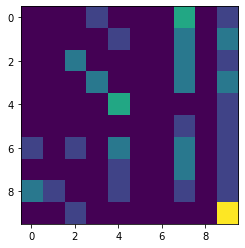

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(matrix)
plt.show()

#Chilean male speakers (followed by Peruvian female speakers)

# Plotting the accuracy and loss curves (from the training) 

In [ ]:
import re

total_loss= [] 
total_acc= []

def plotting_train_data(file): 
  with open(file) as inp:
    for line in inp:
      if "loss = " in line: 
        loss= re.findall(r"\= (.*)$", line)
        for e in loss:
          total_loss.append(float(e))
      if "-->" in line: 
        acc= re.findall(r"\--> (.*)$", line)
        for e in acc:
          total_acc.append(float(e))
#total_loss
#total_acc

In [ ]:
plotting_train_data("reduced_dataset/training_red_SASA.txt")

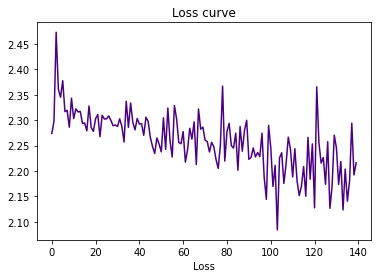

In [ ]:
import matplotlib.pyplot as plt

plt.title("Loss curve")      
plt.xlabel("Loss")
plt.plot(total_loss, color= "indigo")
plt.show()

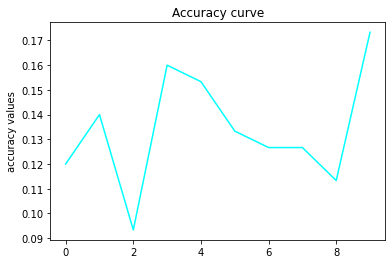

In [ ]:
plt.title("Accuracy curve")      
plt.ylabel("accuracy values")
plt.plot(total_acc, color= "aqua")
plt.show()

# Evaluating the saved models 
(re-defining variables to be able to excecute these cells alone not the entire script) 

# 1st red.dataset -> 150 per test & valid set


# Declaring model and loading trained params 

In [ ]:
target= ["es_ar_female", "es_ar_male", "es_co_female", "es_co_male", "es_pe_female", "es_pe_male", "es_ve_female", "es_ve_male", "es_cl_female","es_cl_male"]

In [ ]:
model= CNNNet(n_class=len(target))
model.load_state_dict(torch.load("reduced_dataset/best_model_SASA_red1.pkl"))
model.eval()
model.cuda()

CNNNet(
  (conv1): Conv2d(1, 64, kernel_size=(8, 20), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 64, kernel_size=(4, 10), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=(1, 1), stride=(1, 1), padding=0, dilation=1, ceil_mode=False)
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=151424, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
)

# Function to check accuracy on test set 

In [ ]:
import time                               #to check the required time 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


test_correct= []                         #list correct selections
totalstarttime=time.time()
#checking the test

def acc_test_set(test_set_generator= test_set_generator, test_set= test_set, batch_size=50):
  for i, test_data in enumerate(test_set_generator): 
    starttime= time.time()
    feats,labels= test_data
    out= model(feats.float().cuda())
    _,pred= torch.max(out.cpu(), dim=1)
    test_correct.append((pred==labels).float())
    print('Iteration %d (%d/%d), time taken: %f' %(i,i*batch_size,len(test_set), time.time()-starttime))

  mat_test=confusion_matrix(labels, pred)              
  print(mat_test)   

  test_accuracy = np.mean(np.hstack(test_correct))
  print('The accuracy on the  test set is %f' %test_accuracy)
  print('It took %f seconds'%(time.time()-totalstarttime))

  return mat_test



# Checking the accuracy on test set 
*15% accuracy*
---



In [ ]:
test_set= SASA_data("reduced_dataset/SASA_data/test_data1.csv", target)
batch_size= 50 
params_test= {"batch_size" : batch_size, 
              "shuffle" : False}
test_set_generator= data.DataLoader(test_set, **params_test)

In [ ]:
test1= acc_test_set()

Iteration 0 (0/150), time taken: 0.033000
Iteration 1 (50/150), time taken: 0.027674
Iteration 2 (100/150), time taken: 0.028079
[[0 0 0 0 0 0 0 2 0 1]
 [0 0 0 1 0 0 0 1 0 2]
 [0 0 1 0 1 0 0 2 0 1]
 [0 1 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 3]
 [0 0 0 0 0 0 0 2 0 2]
 [0 1 0 0 4 0 0 3 0 2]
 [0 0 0 1 0 0 0 3 0 3]
 [0 0 1 0 0 0 0 1 1 2]
 [0 0 0 0 0 0 0 3 0 2]]
The accuracy on the test set is 0.153333
It took 134.281038 seconds


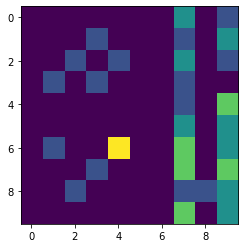

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(test1)
plt.show()

#Venezuelan male speakers (followed by Chilean male speakers)

# Function to check the accuracy on validation set 

In [65]:
import time                               #to check the required time 
from sklearn.metrics import confusion_matrix



valid_correct= []                         #list correct selections
totalstarttime=time.time()
#checking the test

def acc_val_set(valid_set_generator=valid_set_generator , valid_set= valid_set, batch_size=50):
  for i, valid_data in enumerate(valid_set_generator): 
    starttime= time.time()
    feats,labels= valid_data
    out= model(feats.float().cuda())
    _,pred= torch.max(out.cpu(), dim=1)
    valid_correct.append((pred==labels).float())
    print('Iteration %d (%d/%d), time taken: %f' %(i,i*batch_size,len(valid_set), time.time()-starttime))



  mat_valid=confusion_matrix(labels, pred)              
  print(mat_valid)   

  valid_accuracy = np.mean(np.hstack(valid_correct))
  print('The accuracy on the validation set is %f' %valid_accuracy)
  print('It took %f seconds'%(time.time()-totalstarttime))

  return mat_valid

# Validation 

17%

In [ ]:
valid_set= SASA_data("reduced_dataset/SASA_data/valid_data1.csv", target)
batch_size= 50 
params_valid= {"batch_size" : batch_size, 
              "shuffle" : False}
valid_set_generator= data.DataLoader(valid_set, **params_valid)

In [ ]:
val_1= acc_val_set()

Iteration 0 (0/150), time taken: 0.027867
Iteration 1 (50/150), time taken: 0.028327
Iteration 2 (100/150), time taken: 0.027761
[[0 0 0 1 0 0 0 3 0 1]
 [0 0 0 0 1 0 0 2 0 2]
 [0 0 2 0 0 0 0 2 0 1]
 [0 0 0 2 0 0 0 2 0 2]
 [0 0 0 0 3 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 1]
 [1 0 1 0 2 0 0 2 0 1]
 [0 0 0 0 1 0 0 2 0 1]
 [2 1 0 0 1 0 0 1 0 1]
 [0 0 1 0 0 0 0 0 0 5]]
The accuracy on the validation set is 0.173333
It took 77.064629 seconds


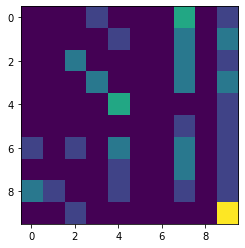

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(val_1)
plt.show()

#Chilean male speakers (followed by Peruvian female speakers)

# 2nd attempt-> 2000 data total (1400 training)

*17% accuracy *

In [ ]:
import copy
import torch.optim as optim
from sklearn.metrics import confusion_matrix

####to store the printing in a txt file 
#import sys 
#original_stdout = sys.stdout -->saving a ref to the standard ouput 


optimizer = optim.SGD(model.parameters(),lr = 0.001)
criterion = torch.nn.CrossEntropyLoss()


model.train()
model.cuda()
best_accuracy = 0
max_epochs= 10

#with open("SASA_red_2000_train.txt", "w") as f:
# sys.stdout = f -->redirecting the ouput to the txt file 

for e in range(max_epochs):
  for i, d in enumerate(train_set_generator):
    f,l = d
    y = model(f.float().cuda())
    loss = criterion(y,l.cuda())
    print("Iteration %d in epoch %d, loss = %.4f"%(i,e,loss.item()))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if i%20==0:
      print("Validation")

      model.eval()
      correct=[]
      for j, valid_data in enumerate(valid_set_generator):
        #print(j)        #remember you CAN REMOVE THIS
        feats, labels=valid_data
        y_eval=model(feats.float().cuda())
        _,pred=torch.max(y_eval.detach().cpu(), dim=1)
        correct.append((pred==labels.float()))

      acc=np.mean(np.hstack(correct))
      iter_acc = 'iteration %d epoch %d--> %f'%(i,e,acc)
      print(iter_acc)
      
      if acc > best_accuracy:
        improved_accuracy = 'Current accuracy = %f (%f), updating best model'%(acc,best_accuracy)
        print(improved_accuracy)
        best_accuracy = acc
        best_epoch= e
        torch.save(model.state_dict(), "reduced_dataset/best_model_SASA_red_2.pkl")  #best_model_SASA.pkl
      model.train()

#sys.stdout = original_stdout  --> resetting standard output

matrix2= confusion_matrix(labels,pred)
print(matrix2)

Iteration 0 in epoch 0, loss = 2.8095
Validation
iteration 0 epoch 0--> 0.100000
Current accuracy = 0.100000 (0.000000), updating best model
Iteration 1 in epoch 0, loss = 3.7949
Iteration 2 in epoch 0, loss = 3.1063
Iteration 3 in epoch 0, loss = 2.2975
Iteration 4 in epoch 0, loss = 2.3349
Iteration 5 in epoch 0, loss = 2.3046
Iteration 6 in epoch 0, loss = 2.3164
Iteration 7 in epoch 0, loss = 2.3059
Iteration 8 in epoch 0, loss = 2.3117
Iteration 9 in epoch 0, loss = 2.3143
Iteration 10 in epoch 0, loss = 2.3051
Iteration 11 in epoch 0, loss = 2.3065
Iteration 12 in epoch 0, loss = 2.3070
Iteration 13 in epoch 0, loss = 2.3095
Iteration 14 in epoch 0, loss = 2.2984
Iteration 15 in epoch 0, loss = 2.3084
Iteration 16 in epoch 0, loss = 2.3077
Iteration 17 in epoch 0, loss = 2.2932
Iteration 18 in epoch 0, loss = 2.3064
Iteration 19 in epoch 0, loss = 2.2868
Iteration 20 in epoch 0, loss = 2.2962
Validation
iteration 20 epoch 0--> 0.106667
Current accuracy = 0.106667 (0.100000), upda

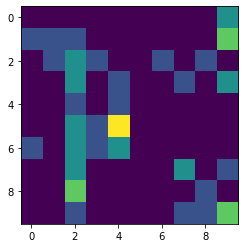

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(matrix2)
plt.show()

#Chilean male speakers (followed by Colombian female speakers & Venezuelan male speakers)

# Plotting training loss/acc. 2nd experiment

In [ ]:
plotting_train_data("reduced_dataset/SASA_red_2000_train.txt")

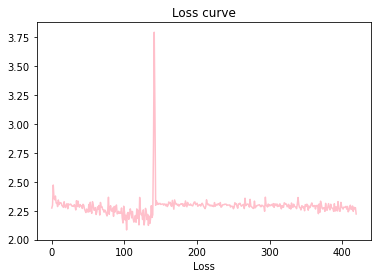

In [ ]:
import matplotlib.pyplot as plt

plt.title("Loss curve")      
plt.xlabel("Loss")
plt.plot(total_loss, color= "pink")
plt.show()

#apparently the model is not working

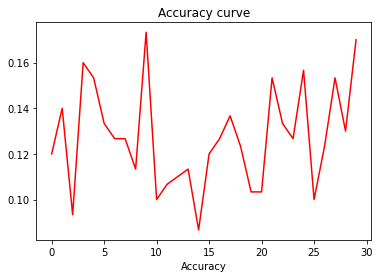

In [ ]:
plt.title("Accuracy curve")      
plt.xlabel("Accuracy")
plt.plot(total_acc, color= "red")
plt.show()

# Evaluation 2nd attempt (300 audiofiles per test & valid. set)

In [ ]:
#2000 audiofiles per training 
model= CNNNet(n_class=len(target))
model.load_state_dict(torch.load("reduced_dataset/best_model_SASA_red_2.pkl"))
model.eval()
model.cuda()

CNNNet(
  (conv1): Conv2d(1, 64, kernel_size=(8, 20), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 64, kernel_size=(4, 10), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=(1, 1), stride=(1, 1), padding=0, dilation=1, ceil_mode=False)
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=151424, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
)

# Checking accuracy on test set (2nd attempt)
*17% accuracy*

In [ ]:

test_set= SASA_data("reduced_dataset/SASA_data/test_data2.csv", target)
batch_size= 50 
params_test= {"batch_size" : batch_size, 
              "shuffle" : False}
test_set_generator= data.DataLoader(test_set, **params_test)

In [ ]:
test_2= acc_test_set()

Iteration 0 (0/300), time taken: 0.084811
Iteration 1 (50/300), time taken: 0.078928
Iteration 2 (100/300), time taken: 0.079256
Iteration 3 (150/300), time taken: 0.079247
Iteration 4 (200/300), time taken: 0.079342
Iteration 5 (250/300), time taken: 0.078921
[[1 0 1 0 0 0 0 2 0 1]
 [0 0 1 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 0 0 2 1]
 [0 0 3 1 0 0 0 0 1 1]
 [1 0 0 0 2 0 0 1 0 1]
 [0 1 0 3 0 0 0 1 0 2]
 [0 0 0 0 0 0 0 0 2 3]
 [0 0 1 1 0 0 0 0 0 2]
 [0 0 3 0 0 0 0 0 1 2]
 [0 0 1 0 0 0 0 0 0 4]]
The accuracy on the test set is 0.170000
It took 258.305727 seconds


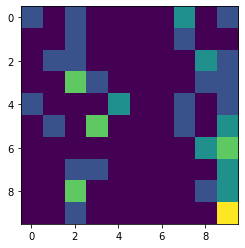

In [ ]:
plt.figure()
plt.imshow(test_2)
plt.show()

#Chilean male speakers (followed by Peruvian female speakers)

# Checking the accuracy on validation set (2nd attempt)
*20% accuracy*

In [ ]:
valid_set= SASA_data("reduced_dataset/SASA_data/valid_data_2.csv", target)
batch_size= 50 
params_valid= {"batch_size" : batch_size, 
              "shuffle" : False}
valid_set_generator= data.DataLoader(valid_set, **params_valid)

In [ ]:
#using 300 files per validation (2 attempt)

val_2= acc_val_set()

Iteration 0 (0/300), time taken: 0.079695
Iteration 1 (50/300), time taken: 0.079516
Iteration 2 (100/300), time taken: 0.079532
Iteration 3 (150/300), time taken: 0.079072
Iteration 4 (200/300), time taken: 0.079251
Iteration 5 (250/300), time taken: 0.079141
[[0 0 0 0 0 0 0 0 0 2]
 [1 1 1 0 0 0 0 0 0 3]
 [0 1 2 1 0 0 1 0 1 0]
 [0 0 2 0 1 0 0 1 0 2]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 2 1 4 0 0 0 0 0]
 [1 0 2 1 2 0 0 0 0 0]
 [0 0 2 0 0 0 0 2 0 1]
 [0 0 3 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 1 1 3]]
The accuracy on the validation set is 0.200000
It took 246.866563 seconds


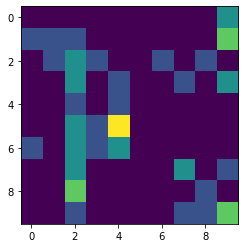

In [ ]:
plt.figure()
plt.imshow(val_2)
plt.show()

#Chilean male speakers (followed by Venezuelan male speakers)

# 3rd attempt (4000 total audiofiles in considered dataset)

19% accuracy , *interrupted, not such different improvements*

In [ ]:
import copy
import torch.optim as optim
from sklearn.metrics import confusion_matrix

####to store the printing in a txt file 

#import sys 
#original_stdout = sys.stdout -->saving a ref to the standard ouput 


optimizer = optim.SGD(model.parameters(),lr = 0.001)
criterion = torch.nn.CrossEntropyLoss()


model.train()
model.cuda()
best_accuracy = 0
max_epochs= 10

#with open("output_training_red_4.txt", "w") as f:
# sys.stdout = f -->redirecting the ouput to the txt file 

for e in range(max_epochs-e):
  for i, d in enumerate(train_set_generator):
    f,l = d
    #y = model(f.float().cuda())
    #loss = criterion(y,l.cuda())
    print("Iteration %d in epoch %d, loss = %.4f"%(i,e,loss.item()))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if i%20==0:
      print("Validation")

      model.eval()
      correct=[]
      for j, valid_data in enumerate(valid_set_generator):
        #print(j)        #remember you CAN REMOVE THIS
        feats, labels=valid_data
        y_eval=model(feats.float().cuda())
        _,pred=torch.max(y_eval.detach().cpu(), dim=1)
        correct.append((pred==labels.float()))

      acc=np.mean(np.hstack(correct))
      iter_acc = 'iteration %d epoch %d--> %f'%(i,e,acc)
      print(iter_acc)
      
      if acc > best_accuracy:
        improved_accuracy = 'Current accuracy = %f (%f), updating best model'%(acc,best_accuracy)
        print(improved_accuracy)
        best_accuracy = acc
        best_epoch= e
        torch.save(model.state_dict(), "reduced_dataset/best_model_SASA_red4.1.pkl")  #best_model_SASA.pkl
      model.train()

matrix5= confusion_matrix(labels,pred)
print(matrix5)

Iteration 0 in epoch 0, loss = 3.0436
Validation
iteration 0 epoch 0--> 0.100000
Current accuracy = 0.100000 (0.000000), updating best model
Iteration 1 in epoch 0, loss = 6.6261
Iteration 2 in epoch 0, loss = 3.0195
Iteration 3 in epoch 0, loss = 2.3415
Iteration 4 in epoch 0, loss = 2.2904
Iteration 5 in epoch 0, loss = 2.2950
Iteration 6 in epoch 0, loss = 2.3292
Iteration 7 in epoch 0, loss = 2.3118
Iteration 8 in epoch 0, loss = 2.3136
Iteration 9 in epoch 0, loss = 2.3253
Iteration 10 in epoch 0, loss = 2.2766
Iteration 11 in epoch 0, loss = 2.2889
Iteration 12 in epoch 0, loss = 2.2892
Iteration 13 in epoch 0, loss = 2.3013
Iteration 14 in epoch 0, loss = 2.3163
Iteration 15 in epoch 0, loss = 2.2853
Iteration 16 in epoch 0, loss = 2.2968
Iteration 17 in epoch 0, loss = 2.3204
Iteration 18 in epoch 0, loss = 2.3337
Iteration 19 in epoch 0, loss = 2.2989
Iteration 20 in epoch 0, loss = 2.2851
Validation
iteration 20 epoch 0--> 0.105000
Current accuracy = 0.105000 (0.100000), upda

# 4th attempt 10% whole datasets 

18%  accuracy on test set 

In this case, there is not the same number of elements for each target group



*   1608,6 files training set
*   344,8 validation set
*   345,4 test set  




In [ ]:
import copy
import torch.optim as optim
from sklearn.metrics import confusion_matrix

####to store the printing in a txt file 
#import sys 
#original_stdout = sys.stdout -->saving a ref to the standard ouput 


optimizer = optim.SGD(model.parameters(),lr = 0.001)
criterion = torch.nn.CrossEntropyLoss()


model.train()
model.cuda()
best_accuracy = 0
max_epochs= 10

#with open("SASA_10_whole_train.txt", "w") as f:
# sys.stdout = f -->redirecting the ouput to the txt file 

for e in range(max_epochs):
  for i, d in enumerate(train_set_generator):
    f,l = d
    y = model(f.float().cuda())
    loss = criterion(y,l.cuda())
    print("Iteration %d in epoch %d, loss = %.4f"%(i,e,loss.item()))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if i%20==0:
      print("Validation")

      model.eval()
      correct=[]
      for j, valid_data in enumerate(valid_set_generator):
        #print(j)        #remember you CAN REMOVE THIS
        feats, labels=valid_data
        y_eval=model(feats.float().cuda())
        _,pred=torch.max(y_eval.detach().cpu(), dim=1)
        correct.append((pred==labels.float()))

      acc=np.mean(np.hstack(correct))
      iter_acc = 'iteration %d epoch %d--> %f'%(i,e,acc)
      print(iter_acc)
      
      if acc > best_accuracy:
        improved_accuracy = 'Current accuracy = %f (%f), updating best model'%(acc,best_accuracy)
        print(improved_accuracy)
        best_accuracy = acc
        best_epoch= e
        torch.save(model.state_dict(), "reduced_dataset/best_model_SASA_whole.pkl")  #best_model_SASA.pkl
      model.train()

#sys.stdout = original_stdout  --> resetting standard output

matrix_w= confusion_matrix(labels,pred)
print(matrix_w)



Iteration 0 in epoch 0, loss = 2.4174
Validation
iteration 0 epoch 0--> 0.084302
Current accuracy = 0.084302 (0.000000), updating best model
Iteration 1 in epoch 0, loss = 3.5127
Iteration 2 in epoch 0, loss = 2.6057
Iteration 3 in epoch 0, loss = 2.3220
Iteration 4 in epoch 0, loss = 2.2801
Iteration 5 in epoch 0, loss = 2.2813
Iteration 6 in epoch 0, loss = 2.2871
Iteration 7 in epoch 0, loss = 2.2985
Iteration 8 in epoch 0, loss = 2.3139
Iteration 9 in epoch 0, loss = 2.3431
Iteration 10 in epoch 0, loss = 2.3261
Iteration 11 in epoch 0, loss = 2.2919
Iteration 12 in epoch 0, loss = 2.2606
Iteration 13 in epoch 0, loss = 2.2524
Iteration 14 in epoch 0, loss = 2.3055
Iteration 15 in epoch 0, loss = 2.2930
Iteration 16 in epoch 0, loss = 2.3408
Iteration 17 in epoch 0, loss = 2.2942
Iteration 18 in epoch 0, loss = 2.2606
Iteration 19 in epoch 0, loss = 2.3103
Iteration 20 in epoch 0, loss = 2.3130
Validation
iteration 20 epoch 0--> 0.151163
Current accuracy = 0.151163 (0.084302), upda

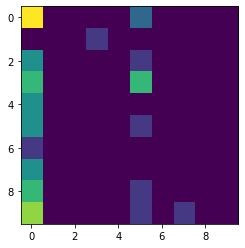

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(matrix_w)
plt.show()

#Argentinian female speakers


# Plotting training curves (model trained on 10% data)

In [ ]:
plotting_train_data("reduced_dataset/SASA_10_whole_train.txt")

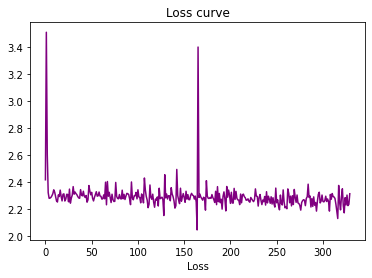

In [ ]:
import matplotlib.pyplot as plt

plt.title("Loss curve")      
plt.xlabel("Loss")
plt.plot(total_loss, color= "purple")
plt.show()

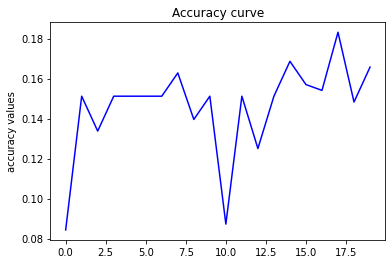

In [ ]:
plt.title("Accuracy curve")      
plt.ylabel("accuracy values")
plt.plot(total_acc, color= "blue")
plt.show()

In [8]:
model= CNNNet(n_class=len(target))
model.load_state_dict(torch.load("reduced_dataset/best_model_SASA_whole.pkl"))
model.eval()
model.cuda()

CNNNet(
  (conv1): Conv2d(1, 64, kernel_size=(8, 20), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 64, kernel_size=(4, 10), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=(1, 1), stride=(1, 1), padding=0, dilation=1, ceil_mode=False)
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=151424, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
)

# Accuracy test set 
checking on 10% of the test set 

16,8% accuracy

In [9]:
test_set= SASA_data("reduced_dataset/SASA_data/test_data_whole.csv", target)
batch_size= 50 
params_test= {"batch_size" : batch_size, 
              "shuffle" : False}
test_set_generator= data.DataLoader(test_set, **params_test)

In [ ]:
test_3= acc_test_set()

Iteration 0 (0/345), time taken: 0.029218
Iteration 1 (50/345), time taken: 0.028197
Iteration 2 (100/345), time taken: 0.027623
Iteration 3 (150/345), time taken: 0.028114
Iteration 4 (200/345), time taken: 0.027937
Iteration 5 (250/345), time taken: 0.028169
Iteration 6 (300/345), time taken: 0.025075
[[2 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 3]
 [1 0 0 0 0 3 0 0 0 2]
 [2 0 0 0 0 1 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 1 0 0 0 4]
 [2 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 1 0 0 0 1]
 [2 1 0 1 0 0 0 0 0 2]]
The accuracy on the test set is 0.168116
It took 282.080666 seconds


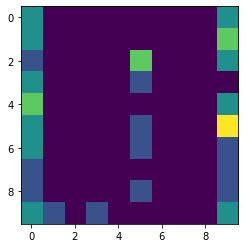

In [ ]:
plt.figure()
plt.imshow(test_3)
plt.show()

#Chilean male speakers and Argentinian female speakers 

# Accuracy on the whole test set (although it is larger than the train set)

17% accuracy

In [ ]:
test_set= SASA_data("SASA_data/test_data.csv", target)
batch_size= 50 
params_test= {"batch_size" : batch_size, 
              "shuffle" : False}
test_set_generator= data.DataLoader(test_set, **params_test)

In [ ]:
test_4= acc_test_set()

Iteration 0 (0/3454), time taken: 0.110035
Iteration 1 (50/3454), time taken: 0.078674
Iteration 2 (100/3454), time taken: 0.078748
Iteration 3 (150/3454), time taken: 0.078845
Iteration 4 (200/3454), time taken: 0.080278
Iteration 5 (250/3454), time taken: 0.078301
Iteration 6 (300/3454), time taken: 0.080444
Iteration 7 (350/3454), time taken: 0.079967
Iteration 8 (400/3454), time taken: 0.080074
Iteration 9 (450/3454), time taken: 0.079377
Iteration 10 (500/3454), time taken: 0.081312
Iteration 11 (550/3454), time taken: 0.079758
Iteration 12 (600/3454), time taken: 0.081057
Iteration 13 (650/3454), time taken: 0.079597
Iteration 14 (700/3454), time taken: 0.080819
Iteration 15 (750/3454), time taken: 0.079823
Iteration 16 (800/3454), time taken: 0.081594
Iteration 17 (850/3454), time taken: 0.080339
Iteration 18 (900/3454), time taken: 0.081083
Iteration 19 (950/3454), time taken: 0.079787
Iteration 20 (1000/3454), time taken: 0.081341
Iteration 21 (1050/3454), time taken: 0.080158

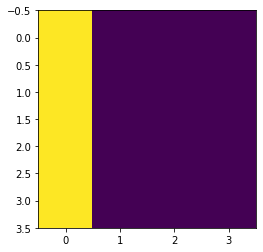

In [ ]:
# because the test set is more than the double of the training set. 

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(test_4)
plt.show()

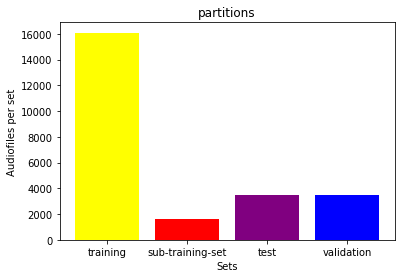

In [ ]:
import matplotlib.pyplot as plt
   
sets = ['training', 'sub-training-set','test','validation']
len_sets = [len(partitions["train"]), len(partitions["train"])*0.1,  len(partitions["test"]), len(partitions["valid"])]
colors= ["yellow", "red", "purple", "blue"]


plt.bar(sets, len_sets, color= colors)
plt.title('partitions')
plt.xlabel('Sets')
plt.ylabel('Audiofiles per set')
plt.show()

# Accuracy validation set (10%)

22% accuracy

In [ ]:
valid_set= SASA_data("reduced_dataset/SASA_data/valid_data_whole.csv", target)
batch_size= 50 
params_valid= {"batch_size" : batch_size, 
              "shuffle" : False}
valid_set_generator= data.DataLoader(valid_set, **params_valid)

In [ ]:
val_3= acc_val_set()

Iteration 0 (0/344), time taken: 0.080605
Iteration 1 (50/344), time taken: 0.080024
Iteration 2 (100/344), time taken: 0.080458
Iteration 3 (150/344), time taken: 0.080156
Iteration 4 (200/344), time taken: 0.081457
Iteration 5 (250/344), time taken: 0.081928
Iteration 6 (300/344), time taken: 0.080915
[[9 0 0 0 0 1 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 3]
 [6 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 1 0 0 0 0]
 [3 1 0 1 0 0 0 0 0 5]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 3]
 [1 1 0 0 0 1 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 2]]
The accuracy on the validation set is 0.220000
It took 478.870621 seconds


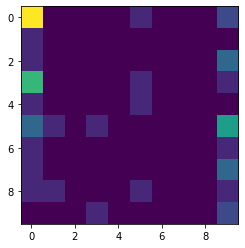

In [ ]:
plt.figure()
plt.imshow(val_3)
plt.show()

#Argentinian female speakers

# Using the whole validation set (not 10% but 100%)

Accuracy 17%

In [9]:
valid_set= SASA_data("SASA_data/valid_data.csv", target)
batch_size= 50 
params_valid= {"batch_size" : batch_size, 
              "shuffle" : False}
valid_set_generator= data.DataLoader(valid_set, **params_valid)

In [12]:
val_4= acc_val_set()

Iteration 0 (0/3448), time taken: 0.108139
Iteration 1 (50/3448), time taken: 0.028948
Iteration 2 (100/3448), time taken: 0.027332
Iteration 3 (150/3448), time taken: 0.027521
Iteration 4 (200/3448), time taken: 0.027552
Iteration 5 (250/3448), time taken: 0.028102
Iteration 6 (300/3448), time taken: 0.027635
Iteration 7 (350/3448), time taken: 0.028385
Iteration 8 (400/3448), time taken: 0.027730
Iteration 9 (450/3448), time taken: 0.027447
Iteration 10 (500/3448), time taken: 0.028455
Iteration 11 (550/3448), time taken: 0.027658
Iteration 12 (600/3448), time taken: 0.028569
Iteration 13 (650/3448), time taken: 0.027925
Iteration 14 (700/3448), time taken: 0.028202
Iteration 15 (750/3448), time taken: 0.027767
Iteration 16 (800/3448), time taken: 0.028419
Iteration 17 (850/3448), time taken: 0.027686
Iteration 18 (900/3448), time taken: 0.028272
Iteration 19 (950/3448), time taken: 0.027680
Iteration 20 (1000/3448), time taken: 0.028284
Iteration 21 (1050/3448), time taken: 0.027931

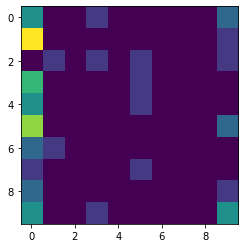

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(val_4)
plt.show()

#Chilean male speakers, Argentinian female speakers 

# 5th Attempt 
 
Model trained on 20% of the entire training set (from original dataset)

Accuracy 62%  
*(see other Notebook for full training, test, valid on 20% entire dataset) *

In [16]:
model= CNNNet(n_class=len(target))
model.load_state_dict(torch.load("best_model_SASA.pkl"))
model.eval()
model.cuda()

CNNNet(
  (conv1): Conv2d(1, 64, kernel_size=(8, 20), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 64, kernel_size=(4, 10), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=(1, 1), stride=(1, 1), padding=0, dilation=1, ceil_mode=False)
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=151424, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
)

# Plots of Training Loss/ Accuracy curves

In [ ]:
plotting_train_data("SASA_20_whole_train.txt")

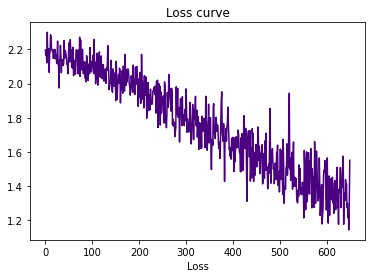

In [ ]:
import matplotlib.pyplot as plt

plt.title("Loss curve")      
plt.xlabel("Loss")
plt.plot(total_loss, color= "indigo")
plt.show()

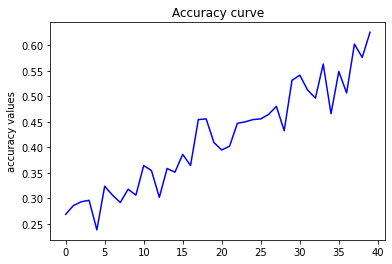

In [ ]:
plt.title("Accuracy curve")      
plt.ylabel("accuracy values")
plt.plot(total_acc, color= "blue")
plt.show()

# Test set (20% training set)

Accuracy 61%

In [ ]:
test_set= SASA_data("SASA_data/test_data.csv", target)
batch_size= 50 
params_test= {"batch_size" : batch_size, 
              "shuffle" : False}
test_set_generator= data.DataLoader(test_set, **params_test)

In [ ]:
test_5= acc_test_set()

Iteration 0 (0/3454), time taken: 0.107241
Iteration 1 (50/3454), time taken: 0.080930
Iteration 2 (100/3454), time taken: 0.079669
Iteration 3 (150/3454), time taken: 0.080369
Iteration 4 (200/3454), time taken: 0.079569
Iteration 5 (250/3454), time taken: 0.079367
Iteration 6 (300/3454), time taken: 0.080454
Iteration 7 (350/3454), time taken: 0.080410
Iteration 8 (400/3454), time taken: 0.080284
Iteration 9 (450/3454), time taken: 0.080776
Iteration 10 (500/3454), time taken: 0.079702
Iteration 11 (550/3454), time taken: 0.079746
Iteration 12 (600/3454), time taken: 0.080173
Iteration 13 (650/3454), time taken: 0.080090
Iteration 14 (700/3454), time taken: 0.080544
Iteration 15 (750/3454), time taken: 0.080161
Iteration 16 (800/3454), time taken: 0.080462
Iteration 17 (850/3454), time taken: 0.080181
Iteration 18 (900/3454), time taken: 0.080586
Iteration 19 (950/3454), time taken: 0.079699
Iteration 20 (1000/3454), time taken: 0.079999
Iteration 21 (1050/3454), time taken: 0.080279

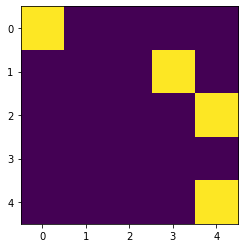

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(mat_test)
plt.show()


# Validation set (20% training set)

61%

In [15]:
valid_set= SASA_data("SASA_data/valid_data.csv", target)
batch_size= 50 
params_valid= {"batch_size" : batch_size, 
              "shuffle" : False}
valid_set_generator= data.DataLoader(valid_set, **params_valid)

In [18]:
val_5= acc_val_set()

Iteration 0 (0/3448), time taken: 0.027414
Iteration 1 (50/3448), time taken: 0.027383
Iteration 2 (100/3448), time taken: 0.027615
Iteration 3 (150/3448), time taken: 0.027294
Iteration 4 (200/3448), time taken: 0.028711
Iteration 5 (250/3448), time taken: 0.027729
Iteration 6 (300/3448), time taken: 0.028395
Iteration 7 (350/3448), time taken: 0.027759
Iteration 8 (400/3448), time taken: 0.028493
Iteration 9 (450/3448), time taken: 0.027733
Iteration 10 (500/3448), time taken: 0.028599
Iteration 11 (550/3448), time taken: 0.027661
Iteration 12 (600/3448), time taken: 0.028292
Iteration 13 (650/3448), time taken: 0.027722
Iteration 14 (700/3448), time taken: 0.028223
Iteration 15 (750/3448), time taken: 0.027769
Iteration 16 (800/3448), time taken: 0.028301
Iteration 17 (850/3448), time taken: 0.027764
Iteration 18 (900/3448), time taken: 0.028312
Iteration 19 (950/3448), time taken: 0.027709
Iteration 20 (1000/3448), time taken: 0.028250
Iteration 21 (1050/3448), time taken: 0.027884

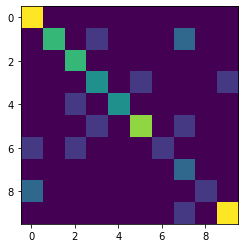

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(mat_valid)
plt.show()

#Argentinian female speakers and Chilean male speakers

# Evaluating the models trained with 700 and 1400 audio files using the whole original test/valid. sets

In [ ]:
model= CNNNet(n_class=len(target))
model.load_state_dict(torch.load("reduced_dataset/best_model_SASA_red1.pkl"))
model.eval()
model.cuda()

CNNNet(
  (conv1): Conv2d(1, 64, kernel_size=(8, 20), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 64, kernel_size=(4, 10), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=(1, 1), stride=(1, 1), padding=0, dilation=1, ceil_mode=False)
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=151424, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
)

# Accuracy on test set 15,5% 

*Model trained with 700 audio files *

In [ ]:
test_6= acc_test_set()

Iteration 0 (0/3454), time taken: 0.079853
Iteration 1 (50/3454), time taken: 0.079182
Iteration 2 (100/3454), time taken: 0.079723
Iteration 3 (150/3454), time taken: 0.078853
Iteration 4 (200/3454), time taken: 0.079512
Iteration 5 (250/3454), time taken: 0.079375
Iteration 6 (300/3454), time taken: 0.080045
Iteration 7 (350/3454), time taken: 0.079548
Iteration 8 (400/3454), time taken: 0.079473
Iteration 9 (450/3454), time taken: 0.079954
Iteration 10 (500/3454), time taken: 0.079474
Iteration 11 (550/3454), time taken: 0.079738
Iteration 12 (600/3454), time taken: 0.080300
Iteration 13 (650/3454), time taken: 0.079257
Iteration 14 (700/3454), time taken: 0.079839
Iteration 15 (750/3454), time taken: 0.079365
Iteration 16 (800/3454), time taken: 0.079752
Iteration 17 (850/3454), time taken: 0.079530
Iteration 18 (900/3454), time taken: 0.079558
Iteration 19 (950/3454), time taken: 0.079120
Iteration 20 (1000/3454), time taken: 0.079602
Iteration 21 (1050/3454), time taken: 0.079579

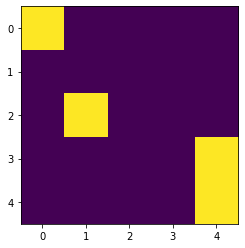

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(mat_test)
plt.show()

# Accuracy on validation 15.3%

*Model trained with 700 audio files*

In [ ]:
val_6= acc_val_set()


Iteration 0 (0/3448), time taken: 0.081171
Iteration 1 (50/3448), time taken: 0.080532
Iteration 2 (100/3448), time taken: 0.080214
Iteration 3 (150/3448), time taken: 0.080057
Iteration 4 (200/3448), time taken: 0.079844
Iteration 5 (250/3448), time taken: 0.079709
Iteration 6 (300/3448), time taken: 0.079871
Iteration 7 (350/3448), time taken: 0.079871
Iteration 8 (400/3448), time taken: 0.079925
Iteration 9 (450/3448), time taken: 0.079700
Iteration 10 (500/3448), time taken: 0.079989
Iteration 11 (550/3448), time taken: 0.080201
Iteration 12 (600/3448), time taken: 0.080052
Iteration 13 (650/3448), time taken: 0.080296
Iteration 14 (700/3448), time taken: 0.080075
Iteration 15 (750/3448), time taken: 0.080154
Iteration 16 (800/3448), time taken: 0.080431
Iteration 17 (850/3448), time taken: 0.079981
Iteration 18 (900/3448), time taken: 0.080242
Iteration 19 (950/3448), time taken: 0.079995
Iteration 20 (1000/3448), time taken: 0.080223
Iteration 21 (1050/3448), time taken: 0.080215

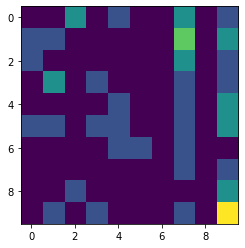

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(mat_valid)
plt.show()

#Chilean male speakers

In [19]:
#model with 1400 audiofiles per training 


model= CNNNet(n_class=len(target))
model.load_state_dict(torch.load("reduced_dataset/best_model_SASA_red_2.pkl"))
model.eval()
model.cuda()

CNNNet(
  (conv1): Conv2d(1, 64, kernel_size=(8, 20), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 64, kernel_size=(4, 10), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=(1, 1), stride=(1, 1), padding=0, dilation=1, ceil_mode=False)
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=151424, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
)

# Accuracy on test set 16,6%

*Model trained with 1400 audio files *

In [ ]:
test_set= SASA_data("SASA_data/test_data.csv", target)
batch_size= 50 
params_test= {"batch_size" : batch_size, 
              "shuffle" : False}
test_set_generator= data.DataLoader(test_set, **params_test)

In [ ]:
test_7= acc_test_set()

Iteration 0 (0/3454), time taken: 0.080271
Iteration 1 (50/3454), time taken: 0.080230
Iteration 2 (100/3454), time taken: 0.080327
Iteration 3 (150/3454), time taken: 0.080460
Iteration 4 (200/3454), time taken: 0.079736
Iteration 5 (250/3454), time taken: 0.079853
Iteration 6 (300/3454), time taken: 0.080055
Iteration 7 (350/3454), time taken: 0.079838
Iteration 8 (400/3454), time taken: 0.080405
Iteration 9 (450/3454), time taken: 0.079978
Iteration 10 (500/3454), time taken: 0.080349
Iteration 11 (550/3454), time taken: 0.079952
Iteration 12 (600/3454), time taken: 0.080170
Iteration 13 (650/3454), time taken: 0.080009
Iteration 14 (700/3454), time taken: 0.080181
Iteration 15 (750/3454), time taken: 0.080237
Iteration 16 (800/3454), time taken: 0.080163
Iteration 17 (850/3454), time taken: 0.080127
Iteration 18 (900/3454), time taken: 0.080175
Iteration 19 (950/3454), time taken: 0.080403
Iteration 20 (1000/3454), time taken: 0.079812
Iteration 21 (1050/3454), time taken: 0.079983

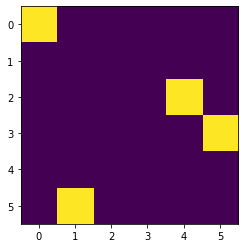

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(test_7)
plt.show()

# Accuracy on validation 17%

*Model trained with 1400 audio files*



In [64]:
valid_set= SASA_data("SASA_data/valid_data.csv", target)
batch_size= 50 
params_valid= {"batch_size" : batch_size, 
              "shuffle" : False}
valid_set_generator= data.DataLoader(valid_set, **params_valid)

In [66]:
val_7= acc_val_set()

Iteration 0 (0/3448), time taken: 0.029007
Iteration 1 (50/3448), time taken: 0.028536
Iteration 2 (100/3448), time taken: 0.027494
Iteration 3 (150/3448), time taken: 0.028051
Iteration 4 (200/3448), time taken: 0.027708
Iteration 5 (250/3448), time taken: 0.028224
Iteration 6 (300/3448), time taken: 0.027774
Iteration 7 (350/3448), time taken: 0.028084
Iteration 8 (400/3448), time taken: 0.027694
Iteration 9 (450/3448), time taken: 0.028339
Iteration 10 (500/3448), time taken: 0.032027
Iteration 11 (550/3448), time taken: 0.028175
Iteration 12 (600/3448), time taken: 0.028002
Iteration 13 (650/3448), time taken: 0.028445
Iteration 14 (700/3448), time taken: 0.027993
Iteration 15 (750/3448), time taken: 0.027965
Iteration 16 (800/3448), time taken: 0.027822
Iteration 17 (850/3448), time taken: 0.028119
Iteration 18 (900/3448), time taken: 0.027756
Iteration 19 (950/3448), time taken: 0.028284
Iteration 20 (1000/3448), time taken: 0.027793
Iteration 21 (1050/3448), time taken: 0.028038

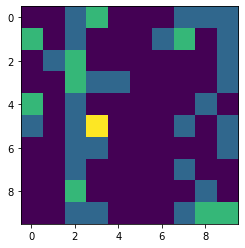

In [67]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(val_7)
plt.show()

#Chilean male speakers 

# Conclusion

The task addressed in this project included: 
- definition of 10 target groups of speakers of South American Spanish Accents 
- creation of 3 partitions with different numbers of speakers per groups and datasets (training, validation and test sets) 
- main goal: given an audio signal, select the correct target from list of targets (distinguishing gender and accent) 
-  features of the audio signal- 40 Mel filter banks on 20ms windows



Because of the limited amount of data used for the training sets, the accuracy levels are not that high (mostly under 30%). 
Here there is a summary of the accuracy values per model on the validation and test sets (both reduced and whole*): 

*the original validation and test sets (from entire dataset) contain the majority of audio files for Argentinian female speakers, Peruvian and Chilean male speakers. 


1. **Experiment 1** (100 audio files selected per target- 750 training set, 150 validation and test sets reduced)

* Acc. on limited valid. set : 17% (best classified: Chilean males and Peruvian females) 
* Acc. on limited test set: 15% (best classified: Venezuelan males and Chilean males)
* Acc. on entire valid set (3448 from part. of entire dataset): 15% (best classified: Chilean males)
* Acc. on entire test set(3454): 15.5% (best classified: Argentinian females and Peruvian/Chilean males)


2. **Experiment 2** (200 audiofiles per target group- 1400 training set, 300 valid. and test sets -reduced) 

* Acc. on limited valid. set: 20% (best classified: Chilean and Venezuelan males) 
* Acc. on limited test set: 17% (best classified: Chilean males and Argentinian females) 
* Acc. on entire valid. set: 17% (best classified: Chilean males) 
* Acc. on entire test set: 16.6% (best classified: Argentinian females) 

3. **Experiment 3**: interrupted (acc. on test set- 3800 files 19%) 

4. **Experiment 4** (10% of the entire dataset partitions, no equal distribution of speakers per target group) 

* Acc. on 10% of valid. set: 22% (best classified:  Argentinian females)
* Acc. on 10% test set: 17% (best class. Chilean males and Argentinian females)
* Acc. on entire valid. set: 17% (best class. Chilean males and Argentinian females)
* Acc. on entire test set: 17% (best classified: Argentinian females) 

5. **Experiment 5** (20% of the entire dataset partitions, test and validation on the entire partitions of 3448 and 3454 files per valid. and test set)

* Acc. on entire valid. set: 61% (best class. Chilean males and Argentinian females)
* Acc. on entire test set: 61% (best class. Chilean males and Argentinian females)


Overall the best identified target groups were Argentinian Female Speakers and Chilean Male Speakers. 

